### Free Software Day | 21 / 09 / 2019 | ENO Mermoz
---
# Workshop Deep Learning
## Classification d'images avec TensorFlow 2 et Fashion MNIST
---
![alt text](https://imgix.bustle.com/uploads/image/2019/6/11/09e3be8c-9a1b-45a0-a9f2-498530dbe75c-tomyicon-homepage.png?w=1080&h=605&fit=crop&crop=faces&auto=format&q=70)
---
Hey Hey ! 😊 Bienvenue dans ce super mega excitant workshop ! Aujourd'hui nous allons apprendre à utiliser TensorFlow 2 avec le langage de programmation Python et le jeu de données Fashion MNIST pour classifier des images de mode en utilisant deux architectures de réseaux de neuronnes different:

1.   Un réseau de neuronnes simple (feed-forward) ou réseaux de perceptrons à multi-couches (MLP)
2.   Un réseau de neuronnes convolutionnel (CNN)

Plus spécifiquement nous allons utiliser **tf.keras** qui est une API de haut niveau sur TensorFlow pour faciliter la création et l'entrainement de notre modèle


## Are You Ready ? Let's Go ! 🤤 🤤
![alt text](https://media.giphy.com/media/lluj1cauAlO2vQEm8A/giphy.gif)



## Definitions

*   ** TensorFlow ** : Créée par l'équipe Google Brain, TensorFlow est une bibliothèque open source pour le calcul numérique et l'apprentissage automatique à grande échelle. TensorFlow regroupe une multitude de modèles et d’algorithmes d’apprentissage automatique et d’apprentissage approfondi (réseautage neuronal) et les rend utiles au moyen d’une métaphore commune. Il utilise Python pour fournir une API frontale pratique permettant de créer des applications avec la structure, tout en les exécutant en C ++ hautes performances.
*   ** Keras ** : Bien que les réseaux de neurones profonds fassent fureur, la complexité des principaux cadres constitue un obstacle à leur utilisation par les développeurs novices en apprentissage automatique. Plusieurs propositions d'améliorations et de simplification des API de haut niveau pour la construction de modèles de réseaux neuronaux ont été proposées. Toutes ont tendance à ressembler de loin, mais montrent des différences à l'examen.
Keras est l’un des principaux API de réseaux de neurones de haut niveau. Il est écrit en Python et prend en charge plusieurs moteurs de calcul de réseau neuronal dorsaux.
*   ** MNIST ** : La base de données MNIST (base de données modifiée de l'Institut national des normes et de la technologie) est une vaste base de données de chiffres manuscrits qui est couramment utilisée pour la formation de divers systèmes de traitement d'images.
MNIST est maintenant devenu un ensemble de données de formation standard pour les chiffres en anglais. Il existe des bases de données similaires établies par d’autres pour des jeux de données de formation pour les chiffres dans d’autres langues et pour les caractères en anglais et dans d’autres langues.
*   ** Fashion MNIST ** : Fashion-MNIST est un ensemble de données d’images d’articles de Zalando comprenant 60 000 exemples de formation et 10 000 exemples de tests. Chaque exemple est une image 28 × 28 en niveaux de gris, associée à une étiquette de 10 classes. Fashion-MNIST est destiné à remplacer directement le jeu de données MNIST d'origine pour l'analyse comparative des algorithmes d'apprentissage automatique.



## Installation des librairies
Pour installer des librairies dans **Google Colab** , on excute la commande: **pip install nom_de_la_librarie==version** . Mais vu que **pip** est une commande **Shell** alors il faut tout le temps mettre un **!** devant la commande pour dire à **Google Colab** que nous voulons executer une commande **Shell** .

Nous allons à présent installer **[TensorFlow](https://www.tensorflow.org)** et **[TensorFlow Datasets](https://www.tensorflow.org/datasets/)** . **TensorFlow Datasets** est un sous-module de **TensorFlow** qui permet de télécharger et de manipuler des jeux de données en les préparant pour être facilement utilisable avec **TensorFlow** dans le format **tf.dataset**

In [ ]:
!pip install tensorflow==2.0.0-rc1 
!pip install -U tensorflow_datasets

     |███▌                            | 9.3MB 223kB/s eta 0:05:44

## Importation de nos librairies dans notre environnement de travail

In [5]:
from __future__ import absolute_import, division, print_function


# Importation de TensorFlow et de TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds

# les autres librairies utilitaires dont on ne peut pas se passer pour faire fonctionner notre code
import math
import matplotlib.pyplot as plt

# On teste pour voir si TensorFlow s'est bien installée
print(tf.__version__)  
print(tfds.__version__) 

2.0.0-rc1
1.2.0


## Téléchargement du jeu de données Fashion MNIST

**On va utiliser Fasion MNIST qui contient 70 000 images qui peuvent etre classees en 10 differentes categories (t-shirt, sandales, ....)**
<br/><br/>

![alt text](https://tensorflow.org/images/fashion-mnist-sprite.png)
<br />
<a href="https://github.com/zalandoresearch/fashion-mnist">Example du jeu de donnees Fashion-MNIST</a> (par Zalando, MIT License).<br/>&nbsp;

**Fashion MNIST est un "remplacement" de MNIST [MNIST](http://yann.lecun.com/exdb/mnist/) qui contient des images avec les nombres 0 a 9.**

Fshion MNIST est un peu plus difficile que le MNIST original en terme d'apprentissage car ayant plus de varitete

elle contient 70 000 images, on va utiliser 60 000 image pour l'entrainement du model et les 10 000 restants pour tester les performances du model

In [9]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

le chargement des donnees nous donne un jeu d'apprentissage et un jeu de test. 

* l'utilisation de  with_info permet d'avoir une variable en retour qui va contenir les informations sur le jeu de donnees telles que le nombre d'observation(Dans les NORMES)
* l'utilisation de as_supervised permet de retourner le jeu donnees sous forme de couple par observation (image,label)

les images sont des matrices 28 $\times$ 28, avec des valeurs dans l'intervalle `[0, 255]`. Les *labels* sont respresentes par un tableau d'entiers, dans l'intervalle `[0, 9]`. ces entiers correspondent aux 10 differentes categories d'images sur le jeu de donnees (Vive les nombres):

<table>
  <tr>
    <th>Label</th>
    <th>Categorie</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

On va creer un tableau pour mapper les entiers sur notre jeu de donnees correspondant aux differentes categories d'images

In [ ]:
class_names = ['T-shirt', 'Pantalon', 'Pull', 'Robe', 'Manteau', 'Sandale', 'Chemise', 'Basket', 'Sac', 'Bottine']

### Explorons les images
Et oui ! il faut tout le temps explorer ses données avant de les utiliser 😉

In [10]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print(f"Nombre d'observations pour l'apprentissage: {num_train_examples}")
print(f"Nombre d'observations pour l'evaluation du model: {num_test_examples}")

Nombre d'observations pour l'apprentissage: 60000
Nombre d'observations pour l'evaluation du model: 10000


In [ ]:
my_image = next(iter(train_dataset))[0].numpy()

## "Normalisons" les images

Comme mentionne precedement les images sont dans l'intervalle  `[0,255]`, on va les transformer pour les forcer dans l'intervalle `[0,1]`.

In [ ]:
def plot_image(image, label, c=plt.cm.binary, multiple=False, dims=None):
    plt.grid(False)
    plt.imshow(image, cmap=c)
    plt.xlabel(label)
    if multiple:
        plt.subplot(*dims)
        plt.xticks([])
        plt.yticks([])
    else:
        plt.figure()
        plt.colorbar()
        plt.show()

In [ ]:
def normalize(images, labels):
  return tf.cast(images, tf.float32) / 255, labels

In [ ]:
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

### Inspection des données normalisées

Affichons une image de notre jeu de données pour voir à quoi elle ressemble

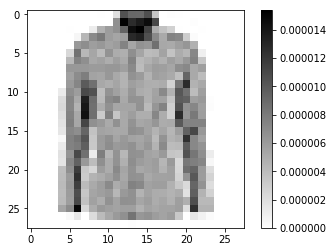

In [22]:
# On va prendre une image et enlever la derniere dimension qui represente la couleur (de toute façon on a qu'un seul élément)
image = next(iter(test_dataset.take(1)))[0].numpy().reshape((28,28))

# Affichons l'image - La mode dans toute sa splendeur :)
plot_image(image)

On va maintenant afficher 25 images pour mieux apprecier le monde de la mode (qui peut le moins peut le plus :) )

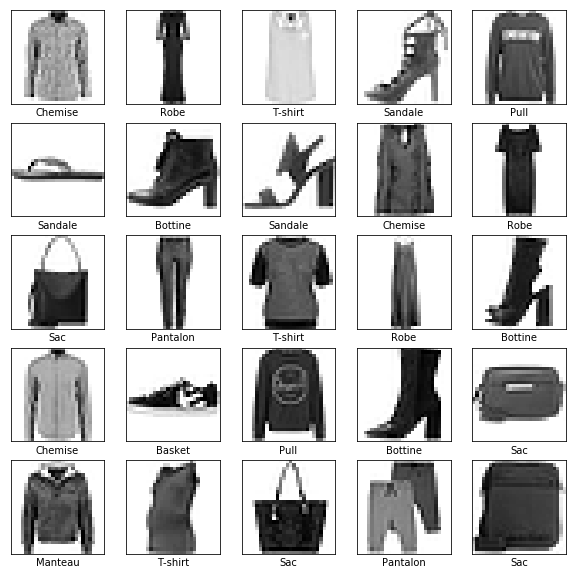

In [24]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    label = class_names[label]
    plot_image(image, label, multiple=True, dims=(5,5,i+1))
    i += 1
plt.show()

## Qui connait la regression lineaire ?


## Et la regression logistique ?

## Et pour finir les arbre de decision ou meilleur que ca Random Forrest (Foret aleatoire BURK)

## Construction du model

On va commencer par creer les couches qui vont etre utiliser pour apprendre les parametres du mode, puis initaliser le model en utilisant la methode build avec la fonction d'optimization et la fonction de perte qu'on veut utiliser

### mise en place des couches

In [ ]:
input_layer = tf.keras.layers.Flatten(input_shape=(28, 28, 1))
hidden_layer = tf.keras.layers.Dense(128, activation=tf.nn.sigmoid)
output_layer = tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
layers = [input_layer, hidden_layer, output_layer]
model = tf.keras.Sequential(layers)

On a trois couches:

* **input ou flatten layer** on l'utiliser ici pour transformer les images de 28 x 28 en un seul vecteur de 784 elements

* **"une couche cachee"** cette couche est la base de notre modele, elle va apprendre des parametres qui quand multiplier avec le vecteur en entree vont donner une "meilleure" representation de l'image du point de vue du model(une representation plus cocise et simple a interpreter pour une machine)

* **une couche de sortie** cette couche va donner en sortie 10 valeurs(ca vous rappele rien ) c'est le nombre de categories sur notre jeu de donnees, donc ces 10 sorties sont just des probabilites, chacune representant la probabilite que l'image appartient a une categorie. (softmax je t'aime, sigmoid => Et moi ? )


### Compilation du modele

Le modele a besoin d'autres parametres pour savoir QUOI et COMMENT faire lors de l'apprentissage

* *La focntion de perte* — Une fonction pour mesurer la performance du model. 
* *L'optimisateur* — Une fonction qui va etre utilise pour optimiser le model cad dimunier au maximum la valeur de sortie de la fonction de perte 
* *Les metriques* — Les metriques sont utilisees pour estimer les performance du modele, ici on va utiliser l'accuracy(exactitude)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Entrainons le model
- on donne le nombre d'images qui compose un batch(apres chaque batch on reevalue les parametres en utilisant la fonction d'optimisation)
- On donne aussi le nombre d'iterations (epocs)
- et pour finir le nombre de steps par epochs (nombre de batch a consomer pour consider un epoch)

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [30]:
history = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 29s 16ms/step - loss: 2.3118 - accuracy: 0.1019
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 2.3102 - accuracy: 0.0984
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 2.3083 - accuracy: 0.1013
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 2.3085 - accuracy: 0.1047
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 2.3065 - accuracy: 0.1063


{'accuracy': [0.81485, 0.8595333, 0.8735, 0.8821333, 0.88808334],
 'loss': [0.5396169630527496,
  0.3913085349480311,
  0.35356516773700714,
  0.3272603239138921,
  0.3076890793045362]}

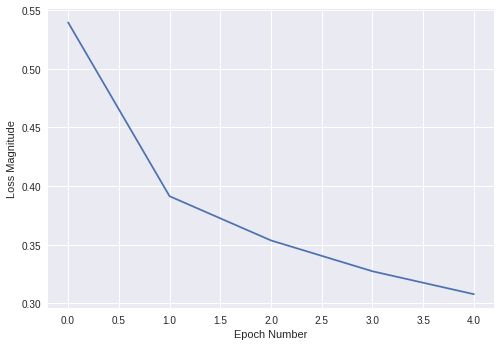

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])
history.history

On constate que durant l'apprentissage la fonction de perte dimunie, alors que la metrique accuracy augmente (deep learning is easy or not)

## Que se passerait-il si on re-execute model.compile apres avoir entraine le modele?

## Evaluons notre model

On va maintenant utiliser le jeu de test pour evaluer le model(les choses serieuses commencent)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("l'exactitude sur le jeu de test :", test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.3519 - accuracy: 0.8723
l'exactitude sur le jeu de test : 0.8723


Hummm, c'est quoi ca .** LOU XEWW  FI** ???? 

eh bien, On a perdu en accuracy. C'est la vie avec les jeux de test et ca peut etre pire dans certains cas(Overfitting is your ENEMY)

##Et si moi je tiens a tout prix a diminuer cet ecart => Maybe use Random Forrest ?

## Hummm je veux pas quitter ce monde moi => Dropout is calling RING RING RING ...

## Explorons les prédictions de notre modèle



In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

Analyson la prediction de la premiere image parmi les 32 constituant le batch qu'on va donne a notre model

In [ ]:
predictions[0]

Ici une prediction est compose de 10 folttantes tel que chaque element represente la probabilite donnee par notre modele pour dire si l'image est associee a ladite categorie. c'est donc la confiance que notre modele a dans la classification de l'image par rapport a cette categorie.

PAr exemple si predictions[0][0] = 0.9 cela voudrait dire que le modele est sur a 90% que l'image appartirnt a la categorie 0 donc T-shirt si on se refere au tableau class_names

In [ ]:
np.argmax(predictions[0])

Donc la grace a la fonction argmax de numpy on constate que le modele predit que l'image est un t-shirt et ceci est verifiable en utilisant le label reel associe a l'image (YUPI)

In [ ]:
test_labels[0]

Maintenant essayons d'afficher dans un graphique la distribution de probabilite que notre model donne cad les 10 flottantes donnees en sortie

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Regardons a nouveau la premiere image 

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

On va maintenant regarder plusieurs images pour comparer et mieux apprecier les predictions faites par notre model. Quand c'est ROUGE c'est une mauvaise predictions et quand c'est BLEU c'est une bonne prediction. 

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## DOJO Time

### Go Go Go Les Ninjas

![alt text](https://media.giphy.com/media/gQi6UyCjtKxwY/giphy.gif)

* ### Que constatez-vous (Figure) ?




Maintenant placons nous dans la vie reelle, cad qu'on a une seule image qu'on voudrait prédire

In [ ]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


* ### Utiliser le modèle pour prédire l'image qui se trouve dans la variable img

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

* ### Donner la categorie de l'image qui a été prédite par le modèle

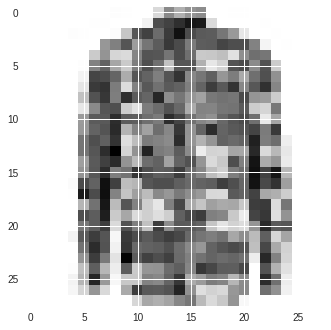

In [ ]:
plt.imshow(my_image[..., 0])

* ### Predire aussi  l'image qui se trouve dans la variable my_image

In [ ]:
# Go Go Go Ninjas !

### A faire a la maison (mauvais souvenirs 🤪😜 )

Jouez avec les hyperprametres et les donnees :
*   Faites varier le nombre d'epochs de 1a 5 pour voir l'impact
*   Changer le nombre de neurones utilises dans le hidden layer et aussi le nombre de couches cachees
*   Ne pas normaliser les images (SURPRISE) => Essayer de bien comprendre les raisons de cette surprise

# Utilisation des réseaux de neurones convolutionnels

![alt text](https://cdn-images-1.medium.com/max/2400/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

### Construction de notre modèle

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

### Compilation du modèle

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Préparation de nos données sous forme de batch

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

### On entraine notre modèle et on garde l'histoire

In [ ]:
history = model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

### On affiche la courbe d'évolution de notre fonction de perte en fonction des époques 

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

### On teste notre modéle pour constater la différence

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("l'exactitude sur le jeu de test :", test_accuracy)